In [1]:
%matplotlib inline
%autosave 0
%load_ext autoreload
%autoreload 2

Autosave disabled


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from dtrace.DTraceUtils import rpath
from dtrace.Associations import Association
from dtrace.RobustAssociations import RobustAssociations

### Import data-sets and associations

In [3]:
assoc = Association(load_associations=True, load_robust=True)

[2019-11-14 10:41:44,316 - INFO]: #(Samples)=484
[2019-11-14 10:41:45,981 - INFO]: #(Drugs)=480; #(Genes)=16643; #(Genomic)=519; 


In [4]:
robust = RobustAssociations(assoc)

## Robust pharmacogenomic associations

Robust pharmacogenomic associations represent pairs of Drug-Gene (drug-response and gene-essentiality) that are
significantly correlated with each other and with a genomic feature (copy-number/mutations) or a gene expression
profile.

In [5]:
robust.assoc.lmm_robust_genomic.query("crispr_fdr < 0.1 & drug_fdr < 0.1").head(
    15
).sort_values("drug_fdr")

,DRUG_ID,DRUG_NAME,VERSION,GeneSymbol,x_feature,drug_beta,drug_beta_se,drug_pval,drug_samples,drug_ncovariates,crispr_beta,crispr_beta_se,crispr_pval,crispr_samples,crispr_ncovariates,drug_fdr,crispr_fdr,DRUG_TARGETS,target_detailed,target
2,1373,Dabrafenib,RS,BRAF,BRAF_mut,-1.658506,0.183874,1.367184e-21,395.0,6.0,-2.243013,0.222449,1.044427e-26,474,6,6.699203e-19,5.117693e-24,BRAF,T,T
3,1373,Dabrafenib,RS,TIPRL,BRAF_mut,-1.658506,0.183874,1.367184e-21,395.0,6.0,-0.791396,0.173847,4.160144e-06,474,6,6.699203e-19,2.038471e-03,BRAF,2,2
4,1373,Dabrafenib,RS,MAPK1,BRAF_mut,-1.658506,0.183874,1.367184e-21,395.0,6.0,-1.566363,0.197345,2.004685e-16,474,6,6.699203e-19,9.822957e-14,BRAF,1,1
5,1373,Dabrafenib,RS,NFATC2,BRAF_mut,-1.658506,0.183874,1.367184e-21,395.0,6.0,-1.014216,0.192196,8.458813e-08,474,6,6.699203e-19,4.144818e-05,BRAF,2,2
6,1373,Dabrafenib,v17,MAPK1,BRAF_mut,-2.026800,0.229204,1.411004e-20,422.0,6.0,-1.566363,0.197345,2.004685e-16,474,6,7.040912e-18,1.000338e-13,BRAF,1,1
7,1373,Dabrafenib,v17,PEA15,BRAF_mut,-2.026800,0.229204,1.411004e-20,422.0,6.0,-1.450551,0.179383,4.935680e-17,474,6,7.040912e-18,2.462904e-14,BRAF,2,2
8,1373,Dabrafenib,v17,BRAF,BRAF_mut,-2.026800,0.229204,1.411004e-20,422.0,6.0,-2.243013,0.222449,1.044427e-26,474,6,7.040912e-18,5.211691e-24,BRAF,T,T
9,2296,GDC-0879,RS,NFATC2,BRAF_mut,-1.302755,0.163651,8.872313e-17,387.0,6.0,-1.014216,0.192196,8.458813e-08,474,6,4.240966e-14,4.043313e-05,BRAF,2,2
10,2296,GDC-0879,RS,BRAF,BRAF_mut,-1.302755,0.163651,8.872313e-17,387.0,6.0,-2.243013,0.222449,1.044427e-26,474,6,4.240966e-14,4.992362e-24,BRAF,T,T
11,1036,PLX-4720,RS,BRAF,BRAF_mut,-1.265396,0.164022,1.050421e-15,408.0,6.0,-2.243013,0.222449,1.044427e-26,474,6,5.283619e-13,5.253468e-24,BRAF,T,T


In [6]:
robust.assoc.lmm_robust_gexp.query("crispr_fdr < 0.1 & drug_fdr < 0.1").head(
    15
).sort_values("drug_fdr")

,DRUG_ID,DRUG_NAME,VERSION,GeneSymbol,x_feature,drug_beta,drug_beta_se,drug_pval,drug_samples,drug_ncovariates,crispr_beta,crispr_beta_se,crispr_pval,crispr_samples,crispr_ncovariates,drug_fdr,crispr_fdr,DRUG_TARGETS,target_detailed,target
1,1047,Nutlin-3a (-),RS,PPM1D,RPS27L,-0.375425,0.049339,1.689565e-15,344,6,-0.362091,0.063538,6.085044e-09,418,6,2.596524e-11,1.870299e-05,MDM2,1,1
2,1047,Nutlin-3a (-),RS,MDM4,RPS27L,-0.375425,0.049339,1.689565e-15,344,6,-0.387304,0.062732,2.579948e-10,418,6,2.596524e-11,1.422048e-06,MDM2,1,1
3,1047,Nutlin-3a (-),RS,TP53BP1,RPS27L,-0.375425,0.049339,1.689565e-15,344,6,0.341358,0.063645,4.778913e-08,418,6,2.596524e-11,1.224039e-04,MDM2,2,2
5,1047,Nutlin-3a (-),RS,TP53,RPS27L,-0.375425,0.049339,1.689565e-15,344,6,0.491846,0.060747,3.057529e-17,418,6,2.596524e-11,1.566270e-13,MDM2,1,1
7,1047,Nutlin-3a (-),RS,USP28,RPS27L,-0.375425,0.049339,1.689565e-15,344,6,0.362357,0.065531,1.752052e-08,418,6,2.596524e-11,2.447776e-05,MDM2,3,3
8,1047,Nutlin-3a (-),RS,MDM2,RPS27L,-0.375425,0.049339,1.689565e-15,344,6,-0.463617,0.063294,3.514940e-14,418,6,2.596524e-11,1.080352e-10,MDM2,T,T
11,1047,Nutlin-3a (-),RS,TP53BP1,MDM2,-0.298926,0.039731,3.709942e-15,344,6,0.281678,0.051135,1.993484e-08,418,6,2.850719e-11,6.127174e-05,MDM2,2,2
13,1047,Nutlin-3a (-),RS,TP53,MDM2,-0.298926,0.039731,3.709942e-15,344,6,0.342472,0.046138,1.510813e-14,418,6,2.850719e-11,3.316882e-11,MDM2,1,1
15,1047,Nutlin-3a (-),RS,USP28,MDM2,-0.298926,0.039731,3.709942e-15,344,6,0.376716,0.052015,7.071493e-14,418,6,2.850719e-11,5.433735e-10,MDM2,3,3
16,1047,Nutlin-3a (-),RS,MDM2,MDM2,-0.298926,0.039731,3.709942e-15,344,6,-0.304086,0.048472,1.283456e-10,418,6,2.850719e-11,2.191573e-07,MDM2,T,T


Frequency of the genomic features across the cancer cell lines

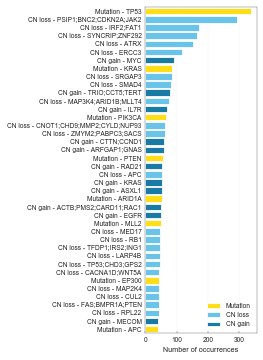

In [7]:
robust.genomic_histogram()
plt.savefig(
    f"{rpath}/robust_mobems_countplot.pdf", bbox_inches="tight", transparent=True
)
plt.show()

Top associations of drug and CRISPR wiht genomic features

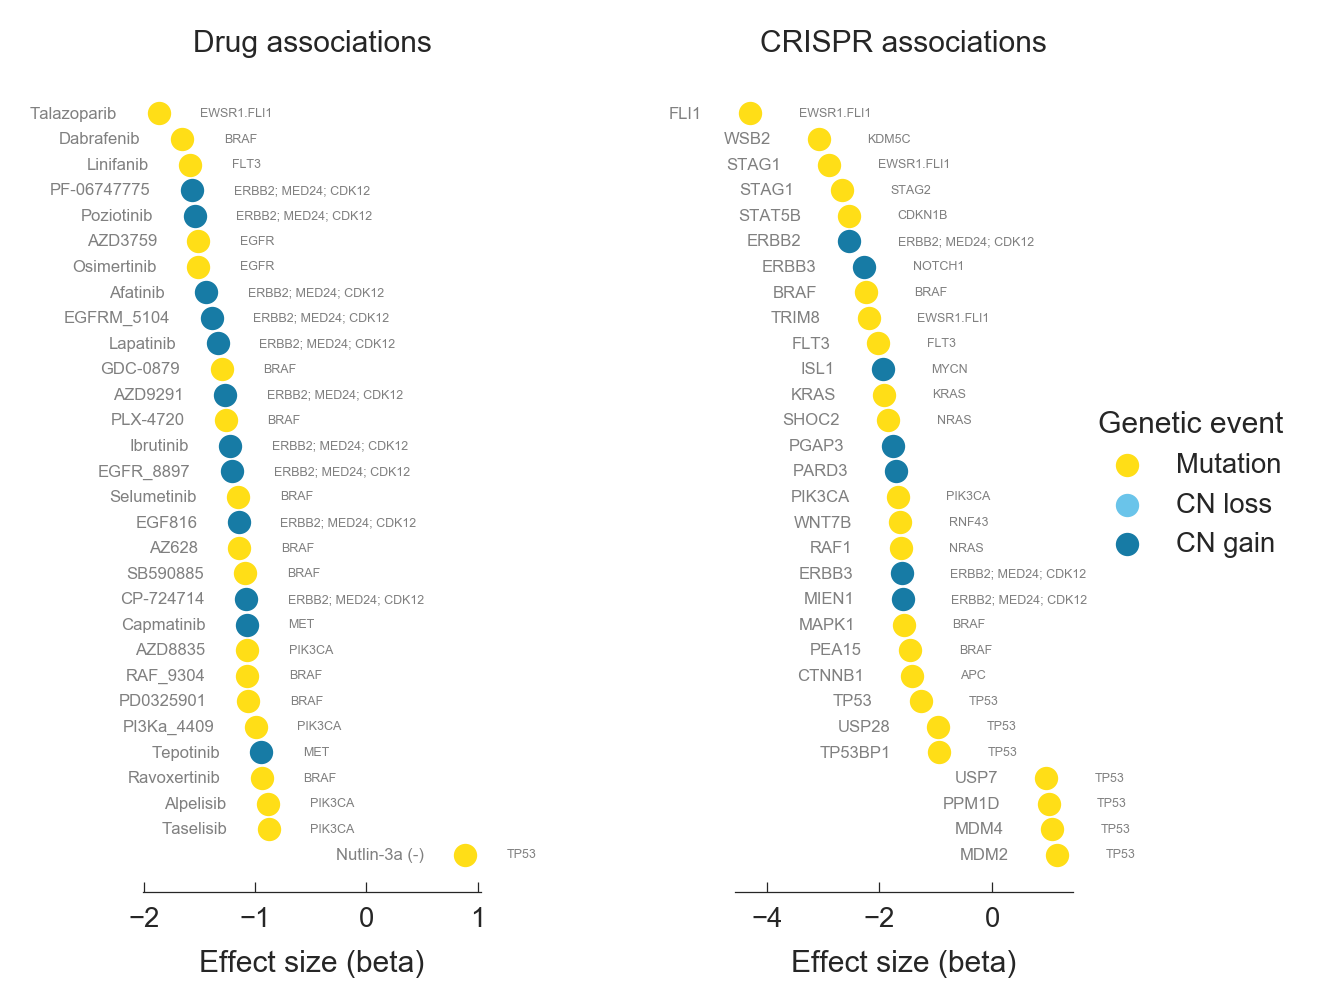

In [8]:
robust.top_robust_features()
plt.savefig(
    f"{rpath}/robust_top_associations.pdf", bbox_inches="tight", transparent=True
)
plt.show()

Top associations of drug and CRISPR with gene-expression

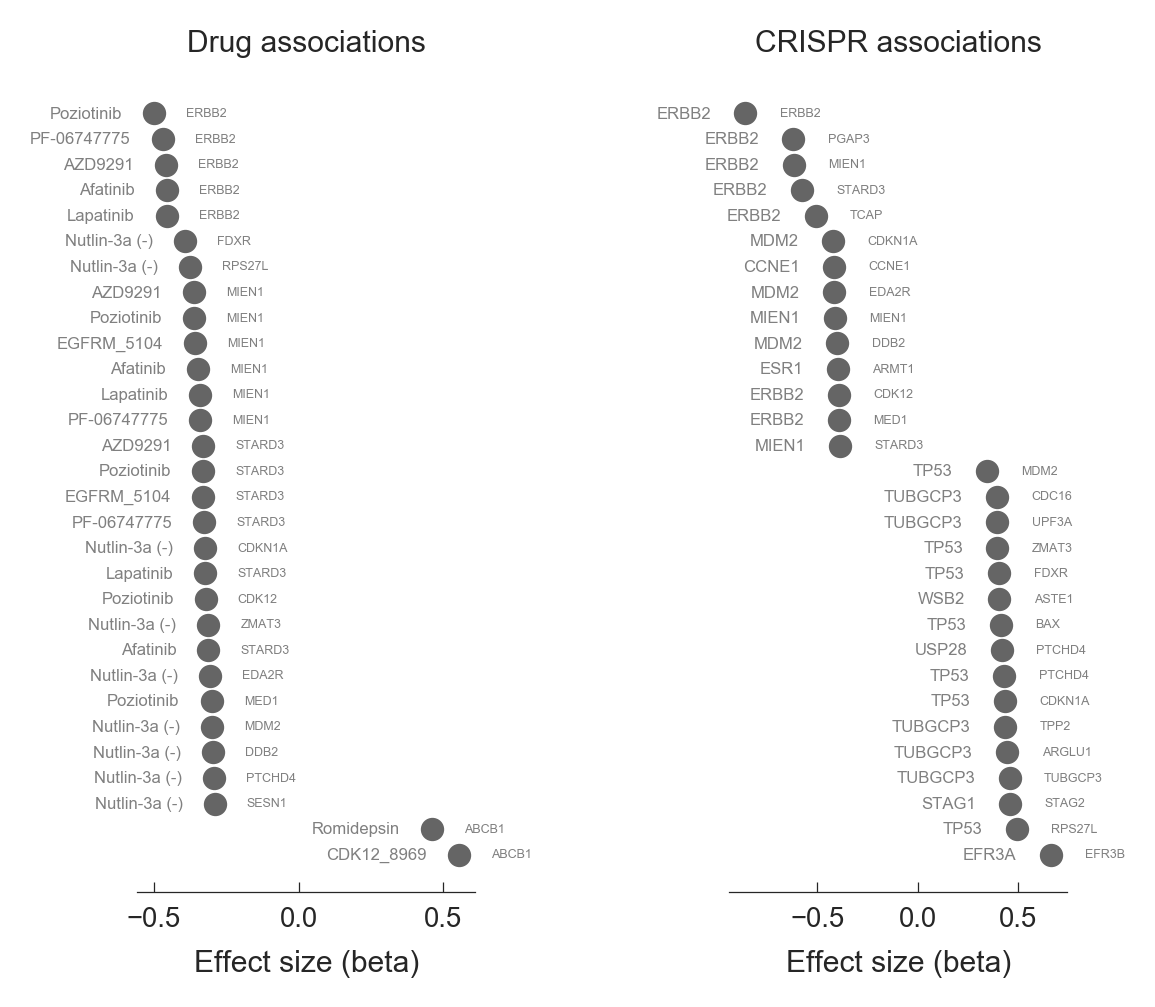

In [9]:
robust.top_robust_features(dtype="gene-expression")
plt.savefig(
    f"{rpath}/robust_top_associations_gexp.pdf", bbox_inches="tight", transparent=True
)
plt.show()

Significant associations count

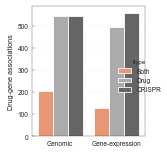

In [10]:
robust.robust_associations_barplot()
plt.gcf().set_size_inches(2, 2)
plt.savefig(
    f"{rpath}/robust_signif_association_barplot.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Significant associations count distributed by distance in the protein-protein interaction network

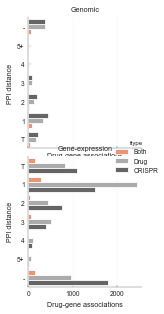

In [11]:
robust.robust_associations_barplot_ppi()
plt.gcf().set_size_inches(2, 4)
plt.savefig(
    f"{rpath}/robust_signif_association_barplot_ppi.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Representative examples of robust pharmacogenomic associations with copy-number and mutations

In [12]:
rassocs = [
    ("Olaparib", "FLI1", "EWSR1.FLI1_mut"),
    ("Dabrafenib", "BRAF", "BRAF_mut"),
    ("Nutlin-3a (-)", "MDM2", "TP53_mut"),
    ("Taselisib", "PIK3CA", "PIK3CA_mut"),
    ("MCL1_1284", "MCL1", "EZH2_mut"),
]

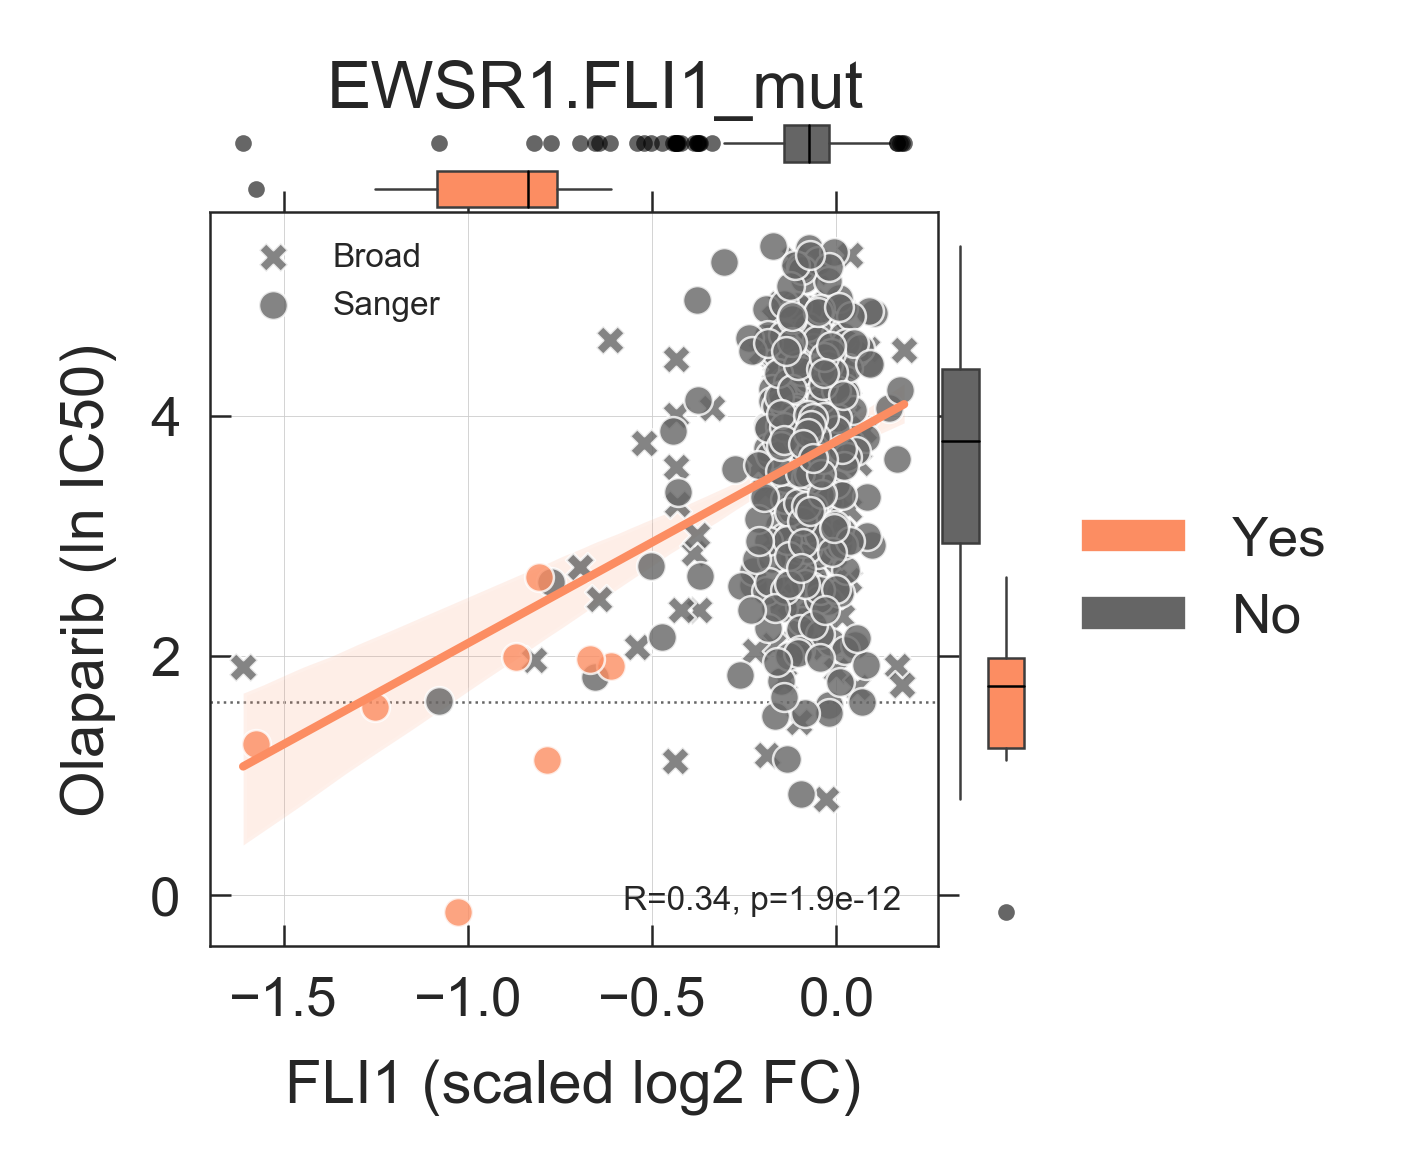

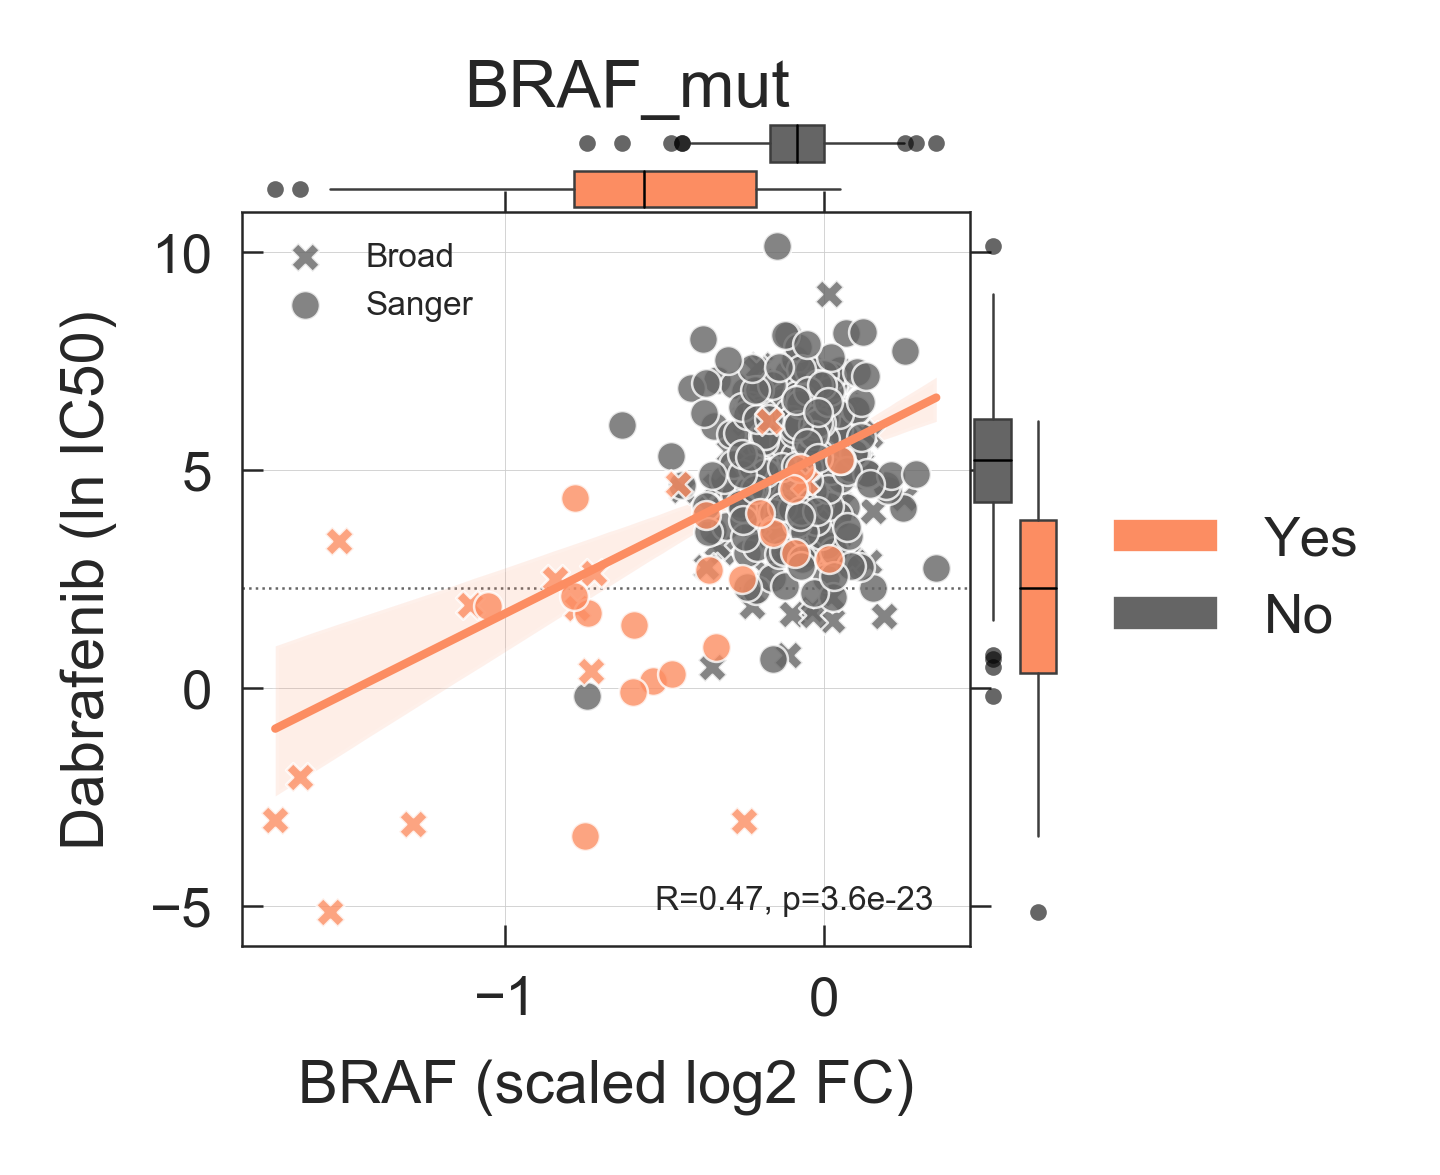

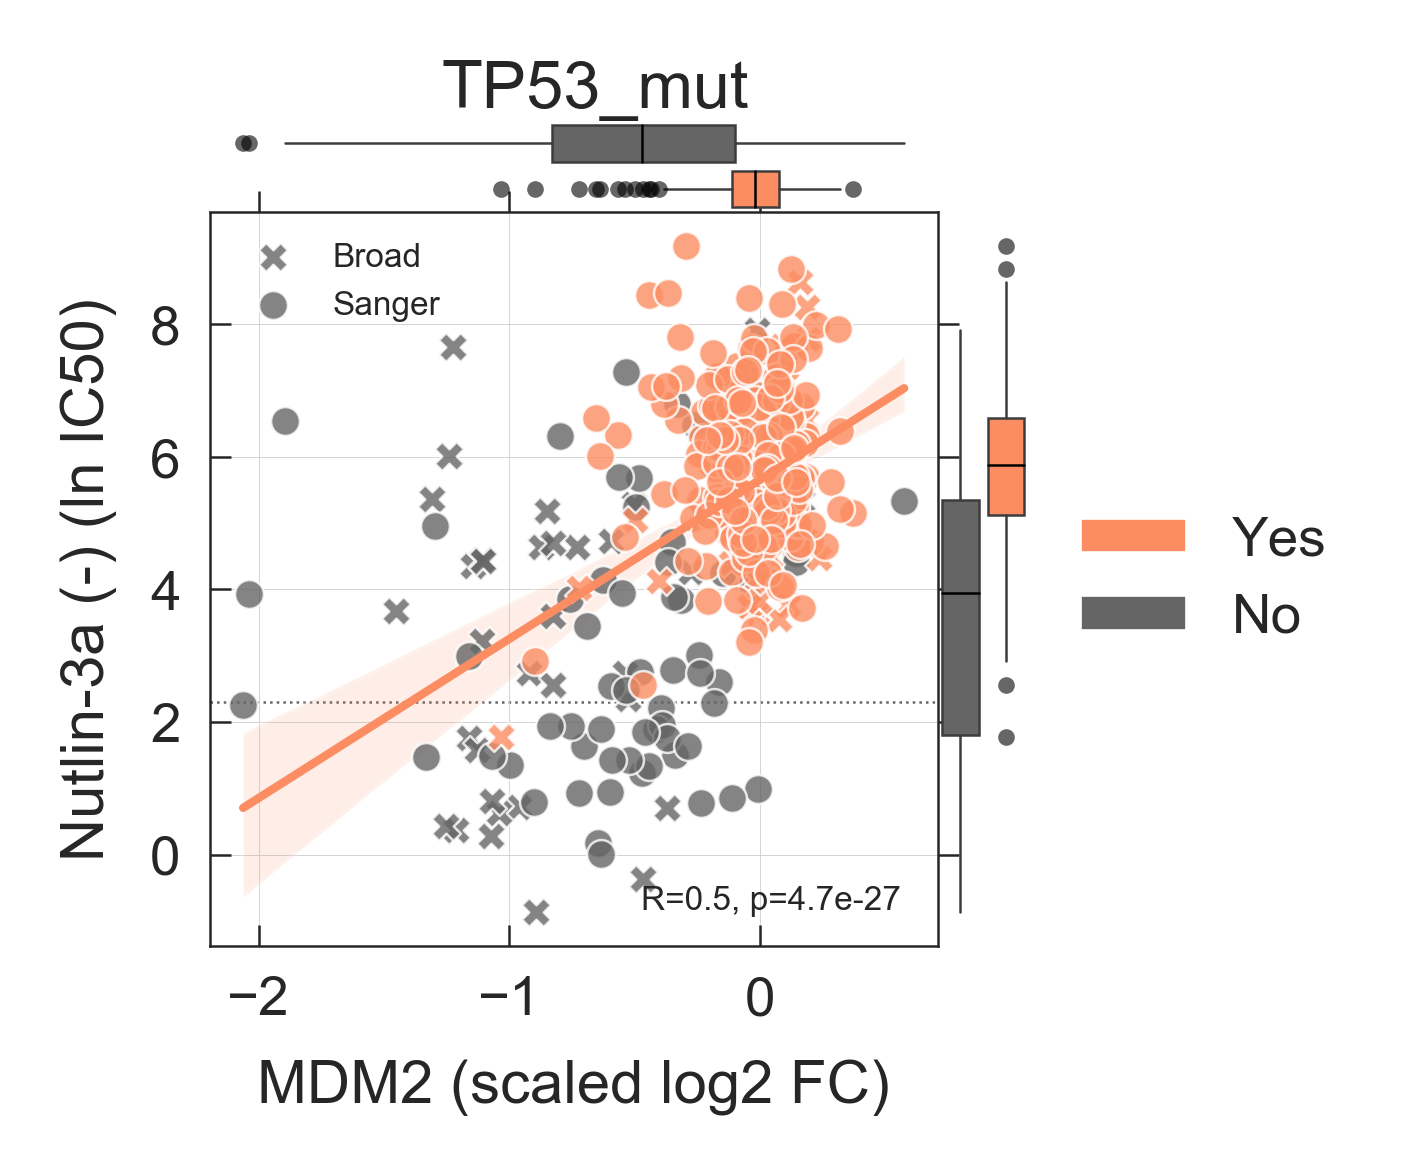

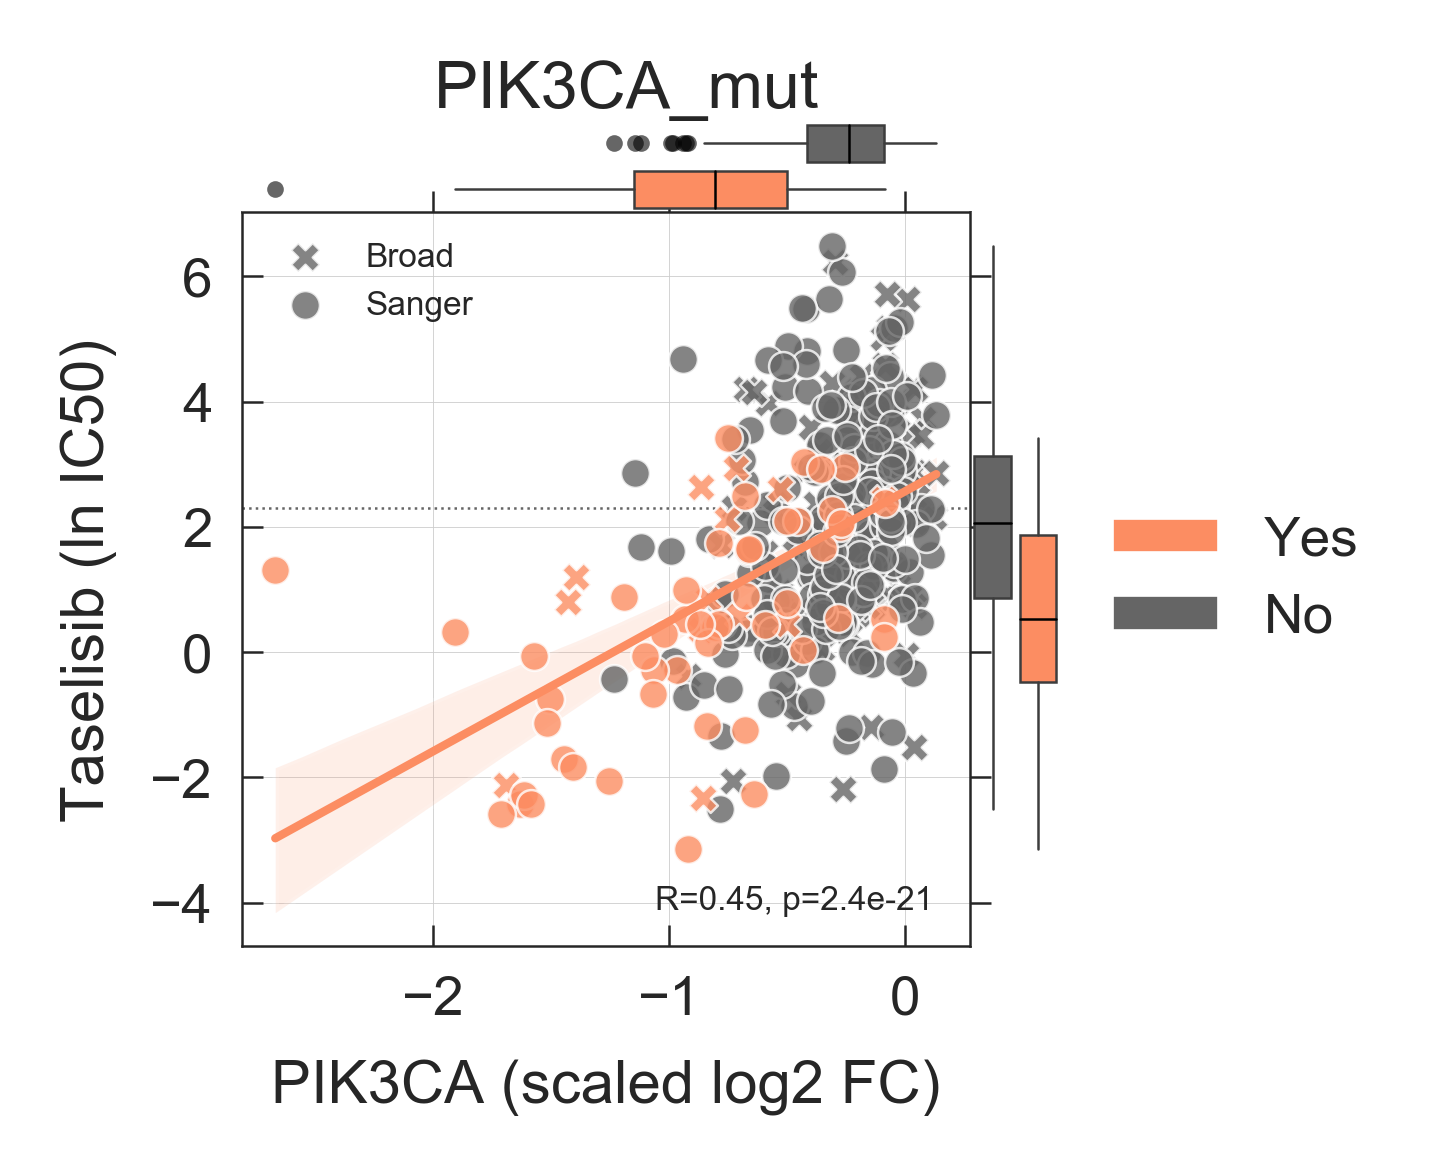

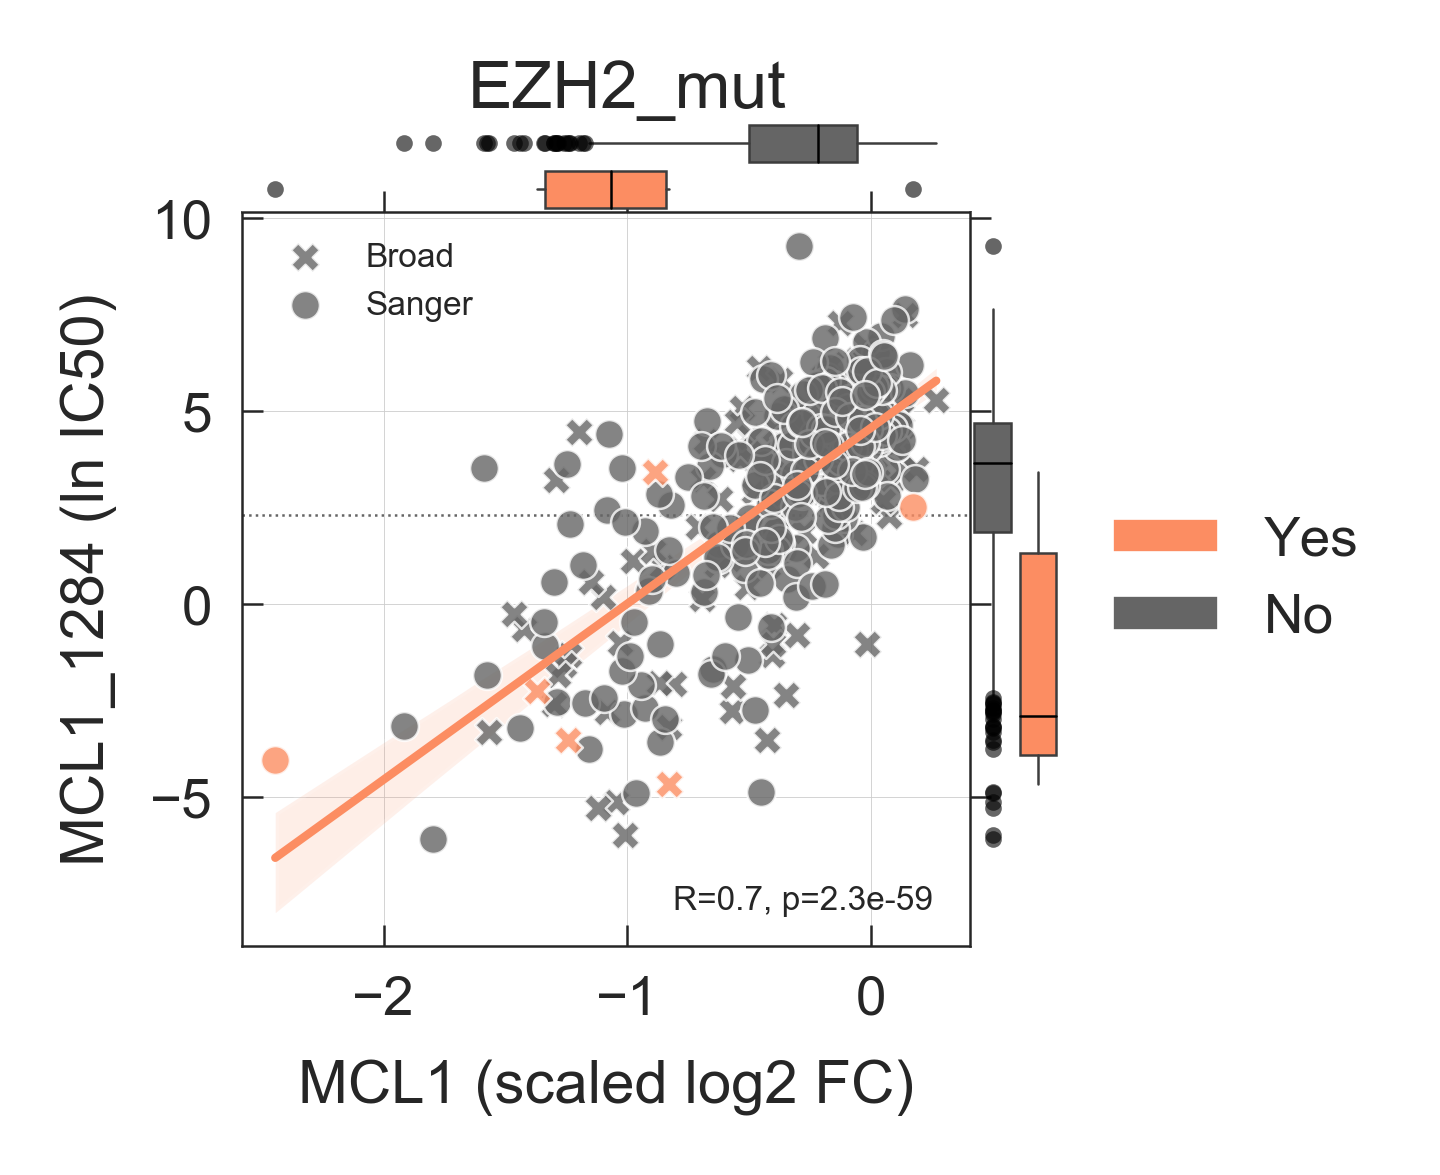

In [13]:
# d, c, g = ('Linifanib', 'STAT5B', 'XRN1_mut')
for d, c, g in rassocs:
    pair = robust.assoc.by(
        robust.assoc.lmm_robust_genomic, drug_name=d, gene_name=c, x_feature=g
    ).iloc[0]

    drug = tuple(pair[robust.assoc.dcols])

    dmax = np.log(robust.assoc.drespo_obj.maxconcentration[drug])

    plot_df = robust.assoc.build_df(
        drug=[drug], crispr=[c], genomic=[g], sinfo=["institute"]
    ).dropna()
    plot_df = plot_df.rename(columns={drug: "drug"})

    grid = robust.plot_corrplot_discrete(f"crispr_{c}", "drug", g, "institute", plot_df)

    grid.ax_joint.axhline(
        y=dmax, linewidth=0.3, color=robust.PAL_DTRACE[2], ls=":", zorder=0
    )

    grid.set_axis_labels(f"{c} (scaled log2 FC)", f"{d} (ln IC50)")

    plt.suptitle(g, y=1.05, fontsize=8)

    plt.gcf().set_size_inches(1.5, 1.5)
    plt.savefig(
        f"{rpath}/robust_scatter_{d}_{c}_{g}.pdf", bbox_inches="tight", transparent=True
    )
    plt.show()

Representative examples of robust pharmacogenomic associations with gene-expression

In [14]:
rassocs = [
    ("MCL1_1284", "MCL1", "BCL2L1"),
    ("Linsitinib", "IGF1R", "IGF1R"),
    ("EGFRM_5104", "ERBB2", "ERBB2"),
    ("Nutlin-3a (-)", "MDM2", "BAX"),
    ("Venetoclax", "BCL2", "CDC42BPA"),
    ("AZD5582", "MAP3K7", "TNF"),
    ("IAP_5620", "MAP3K7", "TNF"),
]

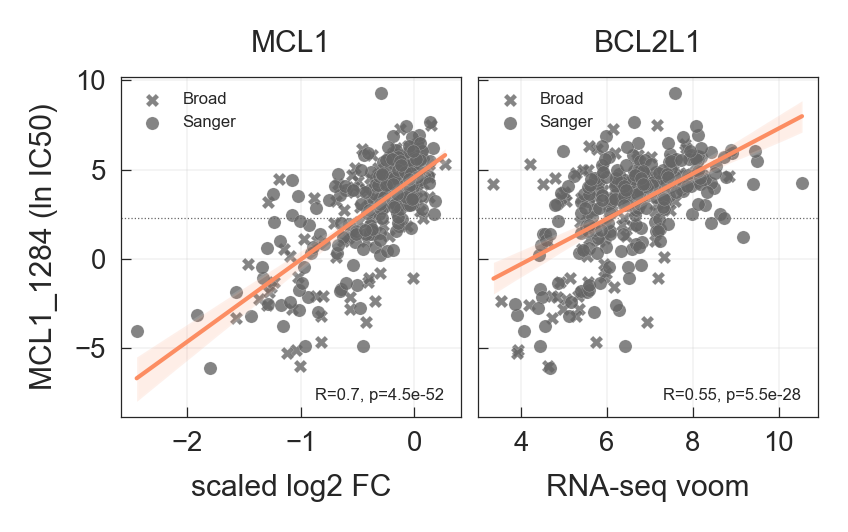

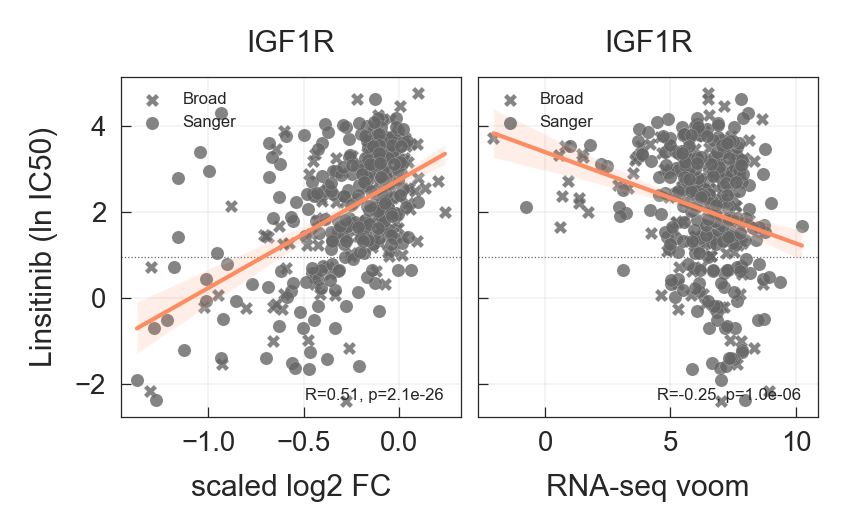

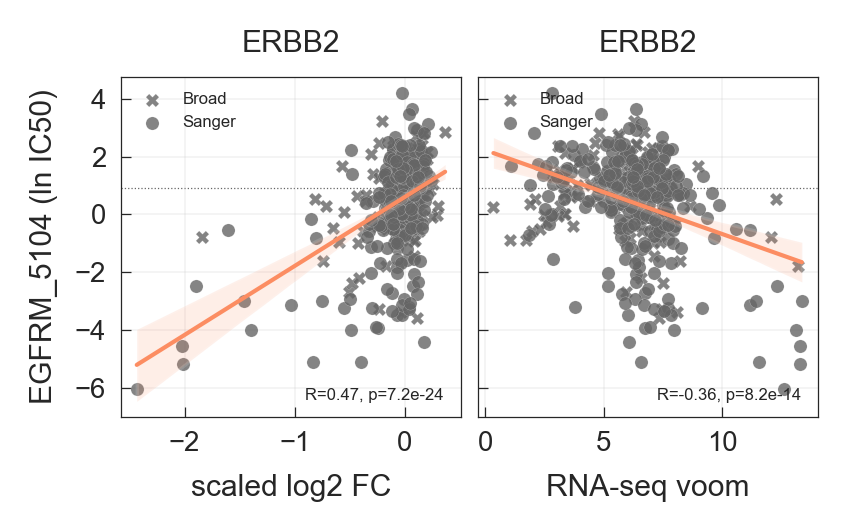

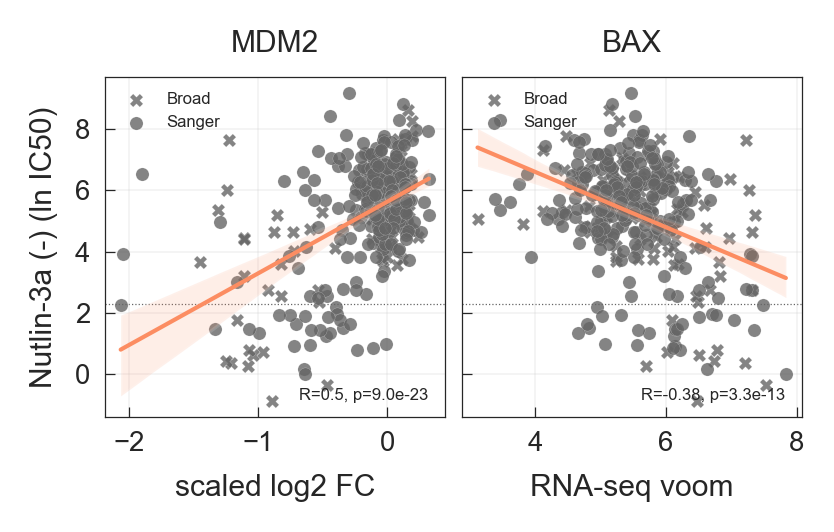

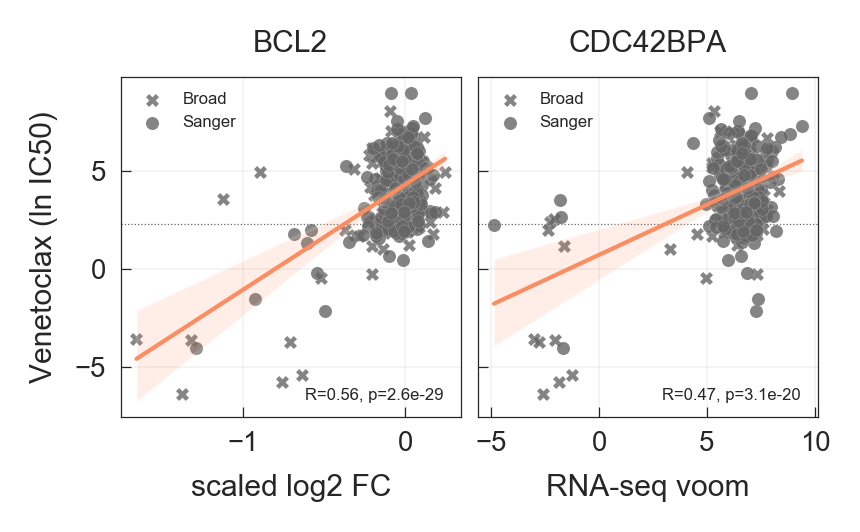

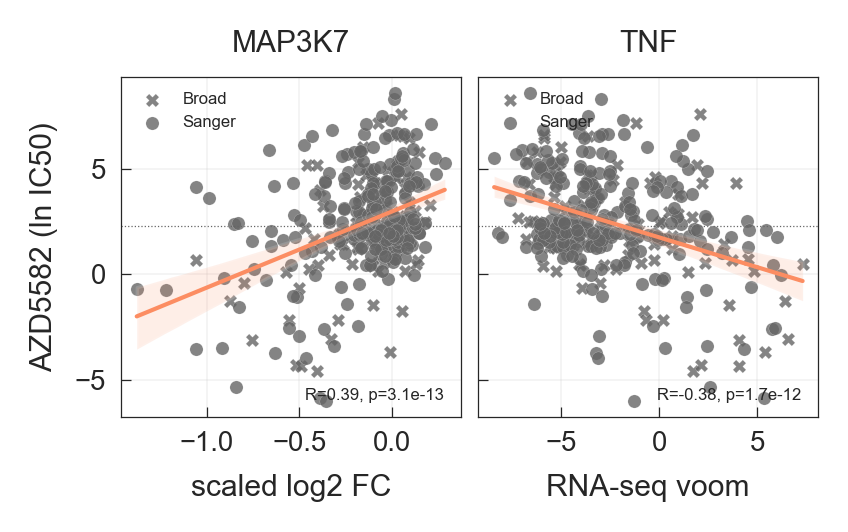

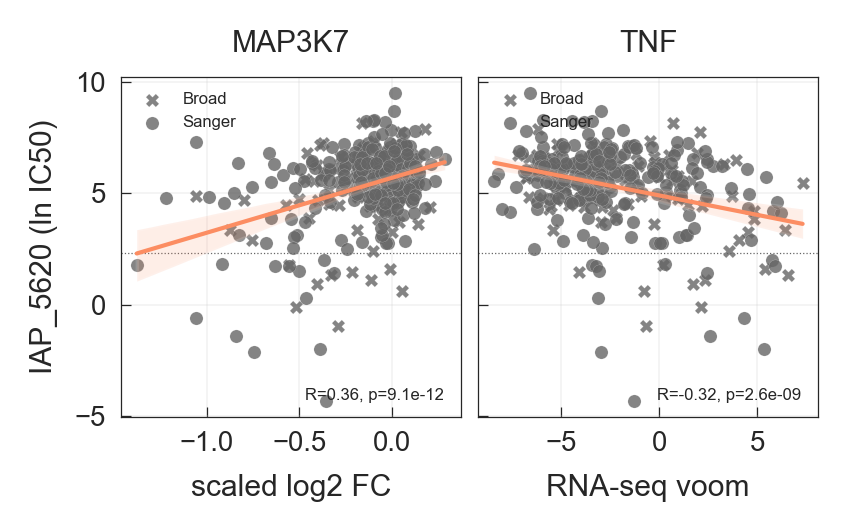

In [15]:
for d, c, g in rassocs:
    pair = robust.assoc.by(
        robust.assoc.lmm_robust_gexp, drug_name=d, gene_name=c, x_feature=g
    ).iloc[0]

    drug = tuple(pair[robust.assoc.dcols])
    dmax = np.log(robust.assoc.drespo_obj.maxconcentration[drug])

    plot_df = robust.assoc.build_df(
        drug=[drug], crispr=[c], gexp=[g], sinfo=["institute", "cancer_type"]
    ).dropna()
    plot_df = plot_df.rename(columns={drug: "drug"})

    #
    fig, axs = plt.subplots(1, 2, sharey="row", sharex="none", dpi=300)

    for i, dtype in enumerate(["crispr", "gexp"]):
        # Scatter
        for t, df in plot_df.groupby("institute"):
            axs[i].scatter(
                x=df[f"{dtype}_{c}" if dtype == "crispr" else f"{dtype}_{g}"],
                y=df["drug"],
                edgecolor="w",
                lw=0.05,
                s=10,
                color=robust.PAL_DTRACE[2],
                marker=robust.MARKERS[t],
                label=t,
                alpha=0.8,
            )

        # Reg
        sns.regplot(
            x=plot_df[f"{dtype}_{c}" if dtype == "crispr" else f"{dtype}_{g}"],
            y=plot_df["drug"],
            data=plot_df,
            color=robust.PAL_DTRACE[1],
            truncate=True,
            fit_reg=True,
            scatter=False,
            line_kws=dict(lw=1.0, color=robust.PAL_DTRACE[0]),
            ax=axs[i],
        )

        # Annotation
        cor, pval = pearsonr(
            plot_df[f"{dtype}_{c}" if dtype == "crispr" else f"{dtype}_{g}"],
            plot_df["drug"],
        )
        annot_text = f"R={cor:.2g}, p={pval:.1e}"

        axs[i].text(
            0.95, 0.05, annot_text, fontsize=4, transform=axs[i].transAxes, ha="right"
        )

        # Misc
        axs[i].axhline(
            y=dmax, linewidth=0.3, color=robust.PAL_DTRACE[2], ls=":", zorder=0
        )

        axs[i].set_ylabel(f"{d} (ln IC50)" if i == 0 else "")
        axs[i].set_xlabel(f"scaled log2 FC" if dtype == "crispr" else f"RNA-seq voom")
        axs[i].set_title(c if dtype == "crispr" else g)

        axs[i].grid(True, ls="-", lw=0.1, alpha=1.0, zorder=0, axis="both")

        # Legend
        axs[i].legend(prop=dict(size=4), frameon=False, loc=2)

    plt.subplots_adjust(wspace=0.05)
    plt.gcf().set_size_inches(3, 1.5)
    plt.savefig(
        f"{rpath}/robust_scatter_gexp_{d}_{c}_{g}.pdf",
        bbox_inches="tight",
        transparent=True,
    )
    plt.show()

Synthetic lethal interaction between STAG1/2. STAG2 mutations lead to dependency in STAG1.

In [16]:
gene_gexp, gene_crispr, gene_mut = "STAG2", "STAG1", "STAG2_mut"

In [17]:
plot_df = robust.assoc.build_df(
    crispr=[gene_crispr], gexp=[gene_gexp], genomic=[gene_mut], sinfo=["institute"]
).dropna()

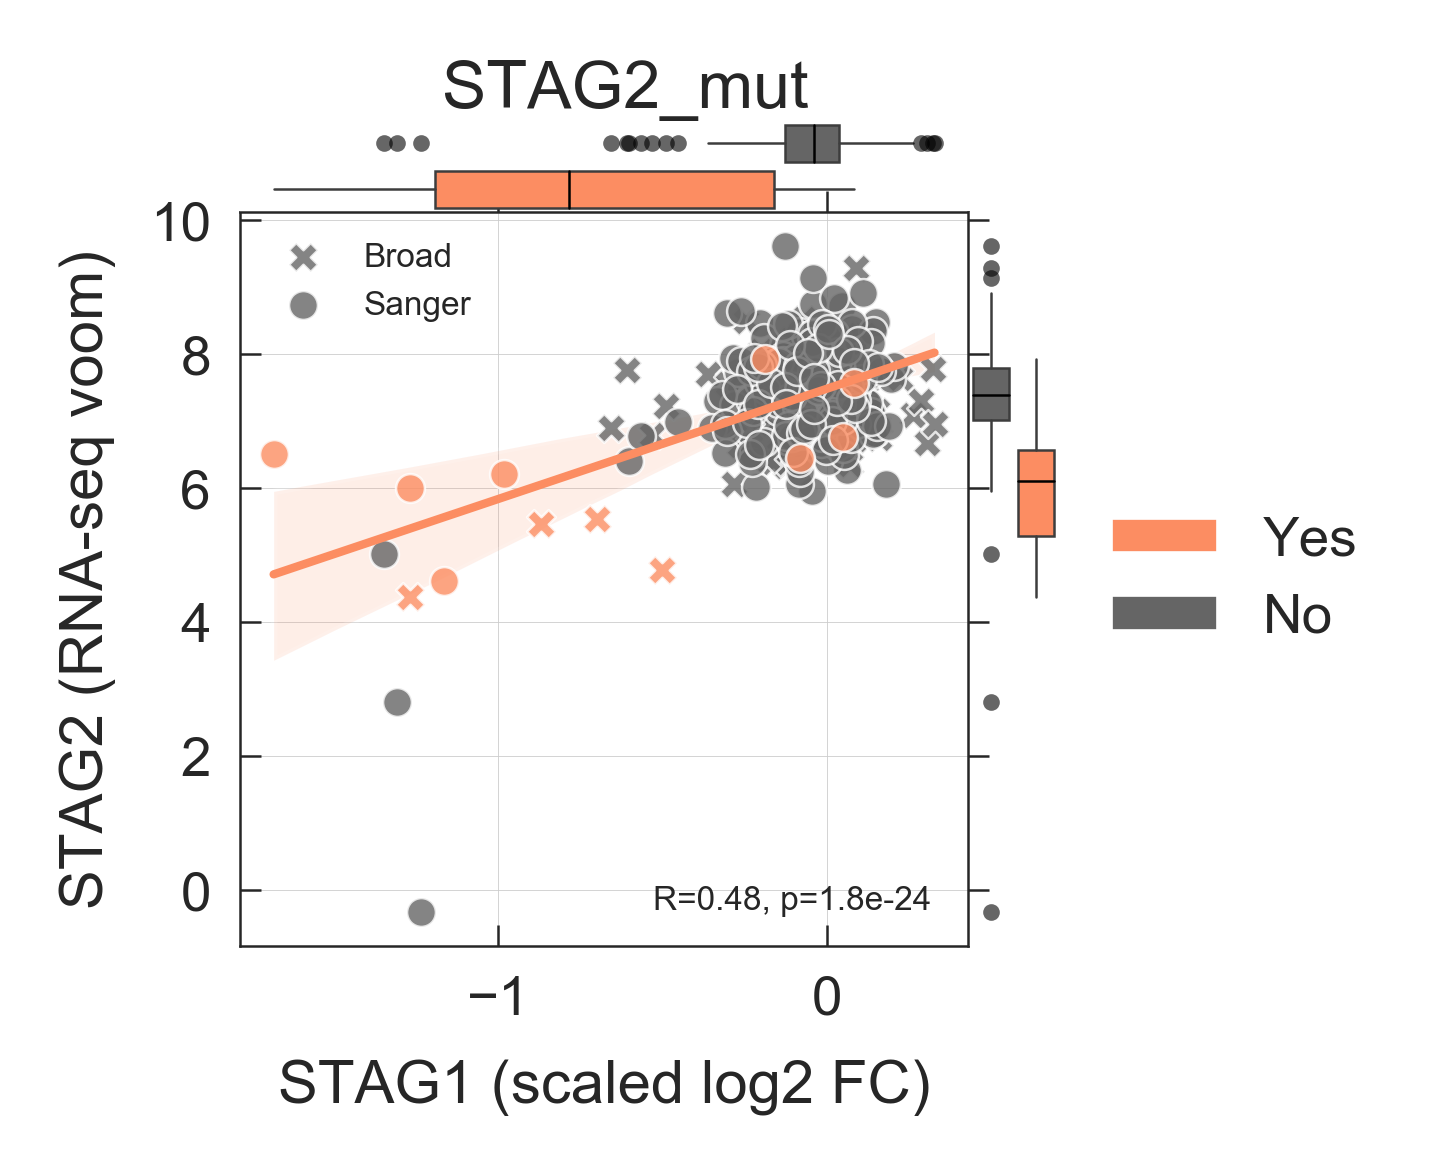

In [18]:
grid = RobustAssociations.plot_corrplot_discrete(
    f"crispr_{gene_crispr}", f"gexp_{gene_gexp}", gene_mut, "institute", plot_df
)
grid.set_axis_labels(f"{gene_crispr} (scaled log2 FC)", f"{gene_gexp} (RNA-seq voom)")
plt.suptitle(gene_mut, y=1.05, fontsize=8)
plt.gcf().set_size_inches(1.5, 1.5)
plt.savefig(
    f"{rpath}/robust_scatter_gexp_crispr_{gene_gexp}_{gene_crispr}_{gene_mut}.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

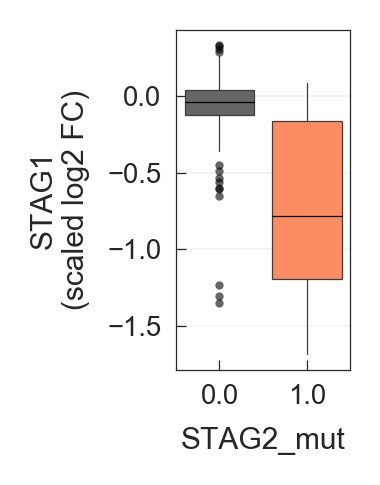

In [19]:
plt.figure(figsize=(0.75, 1.5), dpi=300)
g = RobustAssociations.plot_boxplot_discrete(gene_mut, f"crispr_{gene_crispr}", plot_df)
plt.ylabel(f"{gene_crispr}\n(scaled log2 FC)")
plt.gcf().set_size_inches(0.75, 1.5)
plt.savefig(
    f"{rpath}/robust_genomic_boxplot_{gene_mut}.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Copyright (C) 2019 Emanuel Goncalves